<div>
<img src="GALOGO.jpg" width="200"/>
</div>

### **Hello everyone and thank you for viewing this notebook✨**
#### I am an Information Analyst <font color="pink">**(Ms. Hoor Alsayoof)**</font> who works at the <font color="lightgreen">**CFPB**</font> in the Technology & Innovation department😎, my role is to invistigate and see the overall performance of companies and complaints issues🔍.
#### <font color="green">**So who is the CFPB?**</font> It is a U.S. government agency dedicated to protecting and standing for consumers founded in 2011.
#### The primary mission of the CFPB is to protect consumers in the financial marketplace by enforcing consumer protection laws and regulating financial institutions.
#### In recent years, there has been a noticeable increase in the quarterly volume of complaints received by the Consumer Financial Protection Bureau (CFPB) ever since the year 2019. 
### <font color="red">**Therefore, what is the reason behind those complaints being increased🤔?**</font>
#### This notebook will be used for the invistigation and analyse Consumer Complaints in the Financial Sector

##### The source of the dataset belongs to my company: https://www.consumerfinance.gov/data-research/consumer-complaints/

---

### <font color="lightblue">**Audiance:**</font>
##### The target audience for this project could include but not limited to: consumers dealing with financial services, researchers who might be interested in summarised results, and interested organisations. 


### <font color="lightblue">**Data Dictionary:**</font>
##### 1. Date received: The date the CFPB received the complaint
##### 2. Product: The type of product the consumer identified in the complaint
##### 3. Sub-product: The type of sub-product the consumer identified in the complaint
##### 4. Issue: The issue the consumer identified in the complaint
##### 5. Sub-issue: The sub-issue the consumer identified in the complaint
##### 6. Consumer complaint narrative: Description of what happened from the complaint
##### 7. Company public response: Description of the company's response 
##### 8. Company: The company associated with the complaint 
##### 9. State: The state of the mailing address provided by the consumer
##### 10. ZIP code: The mailing ZIP code provided by the consumer
##### 11. Tags: Supportive data of complaints
##### 12. Consumer consent provided?: Identifies whether the consumer opted in to publish their complaint narrative
##### 13. Submitted via: How the complaint was submitted to the CFPB
##### 14. Date sent to company: The date the CFPB sent the complaint to the company
##### 15. Company response to consumer: How the company responded
##### 16. Timely response?: Whether the company gave a timely response
##### 17. Consumer disputed?: Whether the consumer disputed the company’s response
##### 18. Complaint ID:The unique identification number for a complaint

---

### <font color="cornflowerblue">**Connecting The Data Source**</font>

In [16]:
#importing needed libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [17]:
#uploding the csv file, only one file that contains the whole dataset
df = pd.read_csv("complaints GA.csv")

---

### <font color="purple">**Discovering the volume of the Dataset**</font>

In [3]:
df.shape

(7083173, 18)

In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083173 entries, 0 to 7083172
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 7083173 non-null  object
 1   Product                       7083173 non-null  object
 2   Sub-product                   6847878 non-null  object
 3   Issue                         7083167 non-null  object
 4   Sub-issue                     6324593 non-null  object
 5   Consumer complaint narrative  2346069 non-null  object
 6   Company public response       3518546 non-null  object
 7   Company                       7083173 non-null  object
 8   State                         7033560 non-null  object
 9   ZIP code                      7052945 non-null  object
 10  Tags                          551523 non-null   object
 11  Consumer consent provided?    5813013 non-null  object
 12  Submitted via                 7083173 non-

---

### <font color="lightgreen">**Filter the Dataset Based on Time Period**</font>

In [18]:
#change date received to datetime type, and finding the start date and end date of the dataset by min and max
df["Date received"] = pd.to_datetime(df["Date received"])
start_date = df["Date received"].min()
end_date = df["Date received"].max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2011-12-01 00:00:00
End Date: 2024-12-20 00:00:00


In [19]:
#filter the dataset to include data between 1 JAN 2012, and 31 DEC 2023
fil_df = df[(df['Date received'] >= "2012-01-01") & (df['Date received'] <= "2023-12-31")]
fil_df = fil_df.sort_values(by='Date received')
fil_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4666222,2012-01-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,07430,NaN,NaN,Web,2012-01-03,Closed without relief,Yes,No,9030
3308310,2012-01-01,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,95945,NaN,NaN,Web,2012-01-04,Closed without relief,Yes,Yes,9022
7034328,2012-01-01,Credit card,NaN,Payoff process,NaN,NaN,NaN,"CITIBANK, N.A.",CA,94403,NaN,NaN,Web,2012-01-03,Closed with relief,Yes,No,9002
3114118,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"CITIBANK, N.A.",TX,78575,NaN,NaN,Web,2012-01-03,Closed without relief,Yes,Yes,9011
4600677,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,10553,NaN,NaN,Web,2012-01-03,Closed without relief,No,Yes,9024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876490,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19111,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8086343
4876491,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,36776,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8086347
2960438,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,KY,42262,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8084857
4240377,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,95355,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8081993


---

### <font color="purple">**Data Preprocessing**</font>
##### *Data preprocessing is not restricted to this section only

In [20]:
#change date sent to company and date received to datetime type
fil_df["Date received"] = pd.to_datetime(fil_df["Date received"])
fil_df["Date sent to company"] = pd.to_datetime(fil_df["Date sent to company"])

In [21]:
#making sure of the data type after converitng and taking a specific timeline
fil_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 4503569 entries, 4666222 to 3230513
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Date received                 4503569 non-null  datetime64[ns]
 1   Product                       4503569 non-null  object        
 2   Sub-product                   4269539 non-null  object        
 3   Issue                         4503569 non-null  object        
 4   Sub-issue                     3781011 non-null  object        
 5   Consumer complaint narrative  1693520 non-null  object        
 6   Company public response       2229120 non-null  object        
 7   Company                       4503569 non-null  object        
 8   State                         4459630 non-null  object        
 9   ZIP code                      4473359 non-null  object        
 10  Tags                          451599 non-null   object        
 1

In [9]:
#after deciding on certain data timeline, the number of rows are now 4,503,569
fil_df.shape

(4503569, 18)

In [10]:
#viewing first 5 rows
fil_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4666222,2012-01-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,07430,NaN,NaN,Web,2012-01-03,Closed without relief,Yes,No,9030
3308310,2012-01-01,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,95945,NaN,NaN,Web,2012-01-04,Closed without relief,Yes,Yes,9022
7034328,2012-01-01,Credit card,NaN,Payoff process,NaN,NaN,NaN,"CITIBANK, N.A.",CA,94403,NaN,NaN,Web,2012-01-03,Closed with relief,Yes,No,9002
3114118,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"CITIBANK, N.A.",TX,78575,NaN,NaN,Web,2012-01-03,Closed without relief,Yes,Yes,9011
4600677,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,10553,NaN,NaN,Web,2012-01-03,Closed without relief,No,Yes,9024


In [11]:
#viewing last 5 rows
fil_df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4876490,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19111,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8086343
4876491,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,36776,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8086347
2960438,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,KY,42262,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8084857
4240377,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,95355,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8081993
3230513,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,35242,NaN,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8082360


In [12]:
#cheaking for duplicates
sum(fil_df.duplicated())

0

In [13]:
#cheaking duplicates in ID, all of them are unique
sum(fil_df["Complaint ID"].duplicated())

0

In [14]:
#cheacking nulls
fil_df.isnull().sum() 

Date received                         0
Product                               0
Sub-product                      234030
Issue                                 0
Sub-issue                        722558
Consumer complaint narrative    2810049
Company public response         2274449
Company                               0
State                             43939
ZIP code                          30210
Tags                            4051970
Consumer consent provided?       759840
Submitted via                         0
Date sent to company                  0
Company response to consumer          8
Timely response?                      0
Consumer disputed?              3737795
Complaint ID                          0
dtype: int64

In [22]:
#removing unneccessary column
fil_df = fil_df.drop(columns=["Tags"])

In [10]:
fil_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4666222,2012-01-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,07430,NaN,Web,2012-01-03,Closed without relief,Yes,No,9030
3308310,2012-01-01,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,95945,NaN,Web,2012-01-04,Closed without relief,Yes,Yes,9022
7034328,2012-01-01,Credit card,NaN,Payoff process,NaN,NaN,NaN,"CITIBANK, N.A.",CA,94403,NaN,Web,2012-01-03,Closed with relief,Yes,No,9002
3114118,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"CITIBANK, N.A.",TX,78575,NaN,Web,2012-01-03,Closed without relief,Yes,Yes,9011
4600677,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,10553,NaN,Web,2012-01-03,Closed without relief,No,Yes,9024


In [23]:
#to see how mnay days it takes the CFPB to send the complaint to the company after receiving it
fil_df["CFPB_days_send"] = (fil_df["Date sent to company"] - fil_df["Date received"]).dt.days

In [18]:
#CFPB took 1962 at max to send the complaint😨
fil_df["CFPB_days_send"].max()

1962

In [19]:
#CFPB took -1 days to send the complaint?????🤨
fil_df["CFPB_days_send"].min()

-1

In [20]:
so_much_days= fil_df.nlargest(10, "CFPB_days_send")
so_much_days

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,CFPB_days_send
4546106,2012-04-14,Credit card,NaN,Credit card protection / Debt protection,NaN,NaN,Company has responded to the consumer and the ...,BANK OF THE WEST,CA,90680,NaN,Web,2017-08-28,Closed with explanation,Yes,No,31504,1962
1195735,2017-10-27,Vehicle loan or lease,Lease,Struggling to pay your loan,Lender trying to repossess or disable the vehicle,NaN,NaN,"Dakota Financial, LLC",AZ,85035,Other,Web,2022-12-14,Closed with explanation,Yes,NaN,2713134,1874
4331737,2018-08-06,"Credit reporting, credit repair services, or o...",Credit reporting,Credit monitoring or identity theft protection...,Billing dispute for services,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",CA,91945,Consent not provided,Web,2023-07-13,Closed with explanation,Yes,NaN,2982087,1802
4660597,2012-11-08,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",MD,20878,NaN,Fax,2017-08-28,Closed with explanation,Yes,No,183885,1754
4621120,2012-11-09,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MD,20878,NaN,Fax,2017-08-28,Closed with non-monetary relief,Yes,No,187479,1753
2370025,2018-04-28,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"I was co-signing a car for my son, I was told ...",Company believes it acted appropriately as aut...,HGREG.com,FL,33175,Consent provided,Web,2023-02-09,Closed with explanation,Yes,NaN,2890119,1748
4715848,2013-01-18,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,NaN,Company has responded to the consumer and the ...,Neon Newco Corporation,WA,99206,NaN,Web,2017-06-19,Closed with explanation,Yes,No,245755,1613
4615053,2013-04-10,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,"EQUIFAX, INC.",ME,04105,NaN,Referral,2017-08-28,Closed with explanation,Yes,No,379744,1601
4704567,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T CORPORATION,NC,28052,NaN,Referral,2017-08-29,Closed with explanation,Yes,No,418979,1553
591054,2018-09-29,"Credit reporting, credit repair services, or o...",Other personal consumer report,Improper use of your report,Reporting company used your report improperly,XXXX XXXX XXXX XXXX and dakota financial llc r...,NaN,"Dakota Financial, LLC",TX,76131,Consent provided,Web,2022-12-14,Closed with explanation,Yes,NaN,3032869,1537


In [21]:
so_little_days = fil_df.nsmallest(10, "CFPB_days_send")
so_little_days

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,CFPB_days_send
2442124,2012-01-22,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",MA,01452,NaN,Referral,2012-01-21,Closed without relief,Yes,Yes,15639,-1
1003280,2012-03-05,Student loan,Non-federal student loan,Problems when you are unable to pay,NaN,NaN,NaN,WELLS FARGO & COMPANY,IA,52601,NaN,Referral,2012-03-04,Closed without relief,Yes,No,29919,-1
3736566,2012-03-05,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,JPMORGAN CHASE & CO.,NY,10980,NaN,Referral,2012-03-04,Closed without relief,Yes,No,29925,-1
859306,2012-03-05,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,JPMORGAN CHASE & CO.,NC,28602,NaN,Referral,2012-03-04,Closed without relief,Yes,No,29926,-1
4246344,2012-03-05,Student loan,Non-federal student loan,Problems when you are unable to pay,NaN,NaN,NaN,"Navient Solutions, LLC.",DE,19801,NaN,Referral,2012-03-04,Closed without relief,Yes,No,29922,-1
7020032,2012-03-05,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",NJ,07006,NaN,Referral,2012-03-04,Closed with relief,Yes,No,29918,-1
655215,2012-03-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"CITIBANK, N.A.",IN,46202,NaN,Referral,2012-03-29,Closed without relief,Yes,No,25712,-1
6840881,2012-03-30,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,SLM CORPORATION,KY,40299,NaN,Referral,2012-03-29,Closed without relief,Yes,No,42871,-1
1000850,2012-04-17,Student loan,Non-federal student loan,Repaying your loan,NaN,NaN,NaN,"Navient Solutions, LLC.",NaN,NaN,NaN,Referral,2012-04-16,Closed with explanation,Yes,No,59014,-1
4381579,2012-04-24,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",VA,22408,NaN,Web,2012-04-23,Closed without relief,Yes,Yes,61128,-1


In [22]:
#the sum of when the CFPB takes -1 days to send the complaint to the company 
day_less_one = (fil_df["CFPB_days_send"] == -1).sum()
day_less_one

7036

---

### <font color="crimson">**Relationship between timely response and days to send**</font>

In [23]:
#it doesn't seem to be a relationship between timely response and days to send
summary1 = fil_df.groupby("Timely response?")["CFPB_days_send"].describe()
summary1

,count,mean,std,min,25%,50%,75%,max
Timely response?,,,,,,,,
No,56030.0,5.047457,20.458978,-1.0,0.0,0.0,3.0,1133.0
Yes,4447539.0,1.386346,9.100099,-1.0,0.0,0.0,0.0,1962.0


In [11]:
#cheaking the correlation, to see if responses tend to have lower or higher
fil_df["Timely response (binary)"] = fil_df["Timely response?"].map({"Yes": 1, "No": 0})
corr_check= fil_df["Timely response (binary)"].corr(fil_df["CFPB_days_send"])
corr_check

-0.043469384080846316

##### Since the days it takes the CFPB to send the complaints to the company isn't related to the complaint, there's no relatioonship with it being a timely responed complaint. Also since the aim of this project is to invistigate the complaints related to the companies, we can't make assumptions about the goverment 

In [12]:
#testing the ratio of how many days it takes to send the complaint to the companies usinng new days send
new_day_send = fil_df['Date sent to company']-fil_df['Date received']
res_day = new_day_send.value_counts()/len(new_day_send)*100
print(res_day[:10])

0 days     84.443205
1 days      3.832405
2 days      1.825530
3 days      1.461130
4 days      1.336829
5 days      1.182484
6 days      0.936191
7 days      0.643423
8 days      0.351499
14 days     0.231661
Name: count, dtype: float64


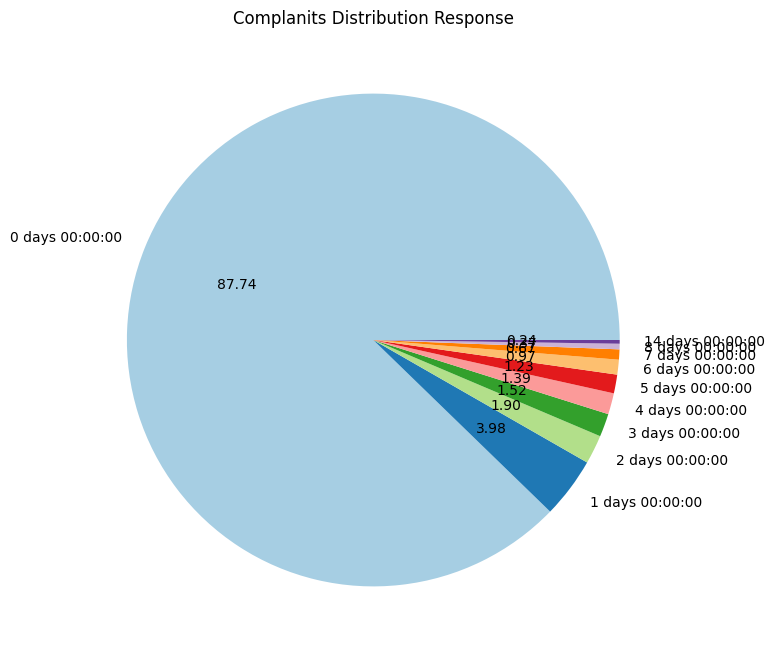

In [13]:
x_plot = res_day[:10].keys()
y_plot = res_day[:10].values
plt.figure(figsize = (8,8))
plt.pie(y_plot, labels=x_plot, autopct='%.2f', colors = sns.color_palette("Paired"))
plt.title("Complanits Distribution Response")
plt.show()

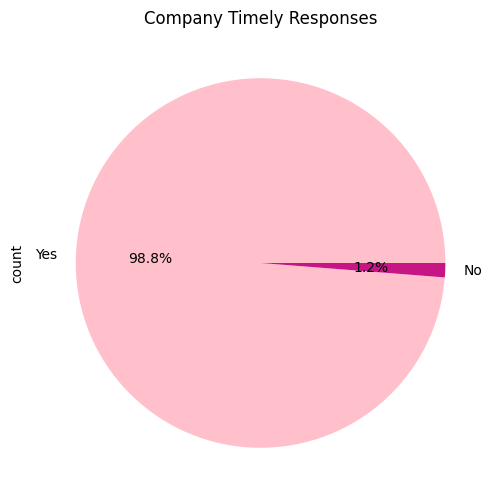

In [14]:
#did the companies gave timely response🤨
fil_df["Timely response?"].value_counts().plot(kind="pie",autopct="%1.1f%%",colors=["pink","mediumvioletred"], figsize=(6, 6))
plt.title("Company Timely Responses")
plt.show()

##### From above findings, we can conclude that around 87% of complaint has been sent to company from the same date of receiving, while around 4% of complaint has been sent to company within 1 day after receiving and so on, these analysis take in mind the timeline from 2012 - 2023

---

### <font color="crimson">**Which financial products-services receive the highest number of consumer complaints**</font>

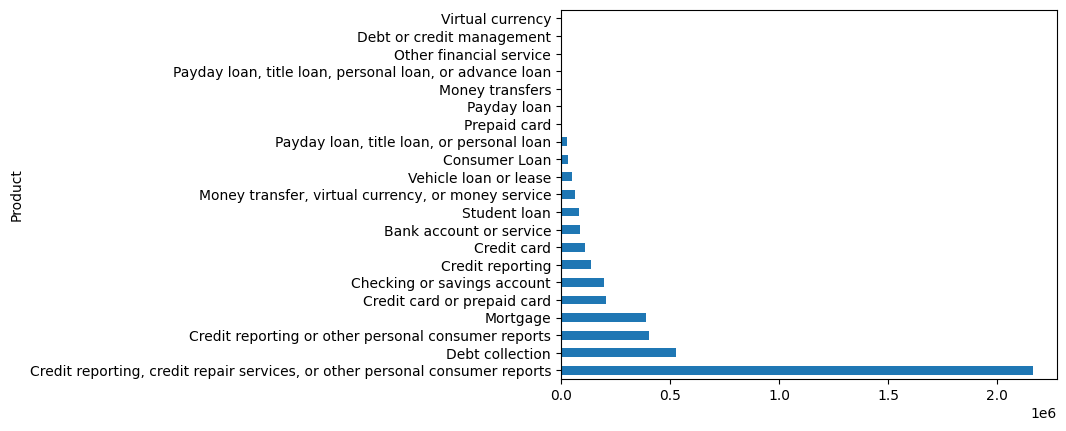

In [24]:
# top products by count,this is a big no so we need to create categories to make it better to look at and make sense
fil_df["Product"].value_counts().plot(kind="barh");

In [28]:
#the count of complaint in each product, so many😨
fil_df["Product"].value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    2163869
Debt collection                                                                  527559
Credit reporting or other personal consumer reports                              402067
Mortgage                                                                         389445
Credit card or prepaid card                                                      206373
Checking or savings account                                                      196965
Credit reporting                                                                 140429
Credit card                                                                      109804
Bank account or service                                                           86205
Student loan                                                                      82953
Money transfer, virtual currency, or money service                                63271
Vehicle loan or lease   

In [25]:
#making a new dictionary so we can create groups containing the product types, and make it prettier🥰
category_mapping = {
    "Credit reporting, credit repair services, or other personal consumer reports": "Credit Reporting and Repair",
    "Credit reporting or other personal consumer reports": "Credit Reporting and Repair",
    "Credit reporting": "Credit Reporting and Repair",
    "Debt collection": "Debt Services",
    "Debt or credit management": "Debt Services",
    "Mortgage": "Loans",
    "Student loan": "Loans",
    "Vehicle loan or lease": "Loans",
    "Consumer Loan": "Loans",
    "Payday loan, title loan, or personal loan": "Loans",
    "Payday loan": "Loans",
    "Payday loan, title loan, personal loan, or advance loan": "Loans",
    "Checking or savings account": "Banking Services",
    "Bank account or service": "Banking Services",
    "Credit card or prepaid card": "Credit and Prepaid Cards",
    "Credit card": "Credit and Prepaid Cards",
    "Prepaid card": "Credit and Prepaid Cards",
    "Money transfer, virtual currency, or money service": "Money Transfers and Virtual Currency",
    "Money transfers": "Money Transfers and Virtual Currency",
    "Virtual currency": "Money Transfers and Virtual Currency",
    "Other financial service": "Other Financial Services"
}

#now adding the new categories column to the main dataframe
fil_df["Product_Category"] = fil_df["Product"].replace(category_mapping)
fil_df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,CFPB_days_send,Product_Category
4666222,2012-01-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NJ,07430,NaN,Web,2012-01-03,Closed without relief,Yes,No,9030,2,Loans
3308310,2012-01-01,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,95945,NaN,Web,2012-01-04,Closed without relief,Yes,Yes,9022,3,Loans
7034328,2012-01-01,Credit card,NaN,Payoff process,NaN,NaN,NaN,"CITIBANK, N.A.",CA,94403,NaN,Web,2012-01-03,Closed with relief,Yes,No,9002,2,Credit and Prepaid Cards
3114118,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"CITIBANK, N.A.",TX,78575,NaN,Web,2012-01-03,Closed without relief,Yes,Yes,9011,2,Loans
4600677,2012-01-01,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,10553,NaN,Web,2012-01-03,Closed without relief,No,Yes,9024,2,Loans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876490,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,19111,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8086343,0,Credit Reporting and Repair
4876491,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,36776,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8086347,0,Credit Reporting and Repair
2960438,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,KY,42262,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8084857,0,Credit Reporting and Repair
4240377,2023-12-31,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,95355,Consent not provided,Web,2023-12-31,Closed with non-monetary relief,Yes,NaN,8081993,0,Credit Reporting and Repair


In [30]:
#the new categories, so cute and organised😍
fil_df["Product_Category"].value_counts()

Product_Category
Credit Reporting and Repair             2706365
Loans                                    594031
Debt Services                            528044
Credit and Prepaid Cards                 322258
Banking Services                         283170
Money Transfers and Virtual Currency      68643
Other Financial Services                   1058
Name: count, dtype: int64

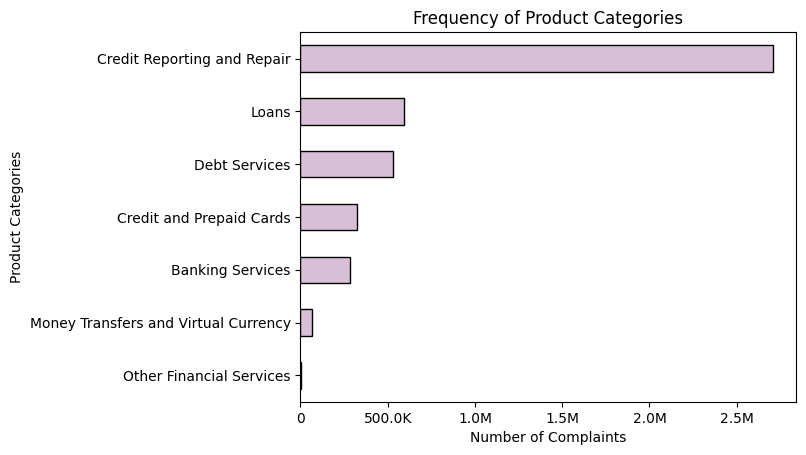

In [27]:
#plotting the new product categories
# Format numbers as 'X.XM' for millions and 'X.XK' for thousands, so it can be clear
def format_xaxis(value, _):
    if value >= 1_000_000:  # For 1 million and above
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:  # For thousands
        return f"{value / 1_000:.1f}K"
    else:  # For values below 1,000
        return f"{int(value)}"

ax = fil_df["Product_Category"].value_counts(ascending=True).plot(kind="barh", title="Frequency of Product Categories",color="thistle", edgecolor="black")
plt.xlabel("Number of Complaints")
plt.ylabel("Product Categories")

#applyoing the formatter 
ax.xaxis.set_major_formatter(FuncFormatter(format_xaxis))
plt.show()

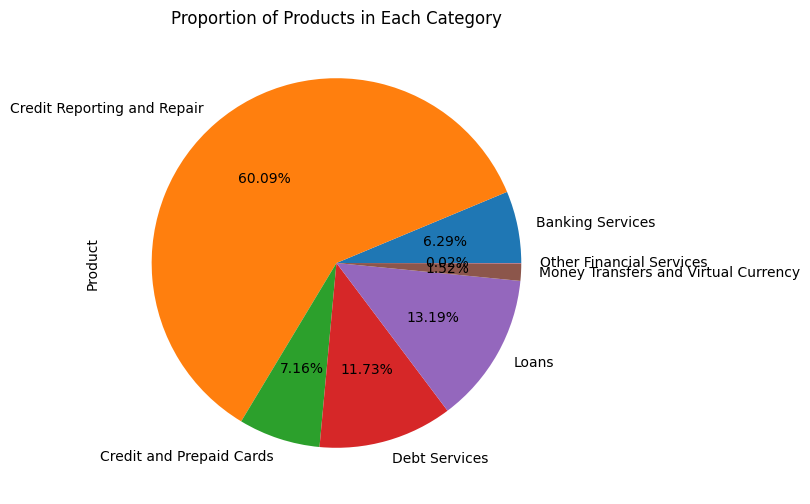

In [32]:
#showing the proportion for each categoty, the pie chart is not the right fit for the categorisation but to view the proportion only
product_counts = fil_df.groupby("Product_Category")["Product"].count()
product_counts.plot(kind="pie",figsize=(6, 6),autopct="%.2f%%",title="Proportion of Products in Each Category")
plt.show()

##### Most complaints are coming from the following product categories:
###### 1. Credit Rporting and Repair 
###### 2. Loans
###### 3. Debt Services

---

### <font color="crimson">**The volume of complaints overtime**</font>

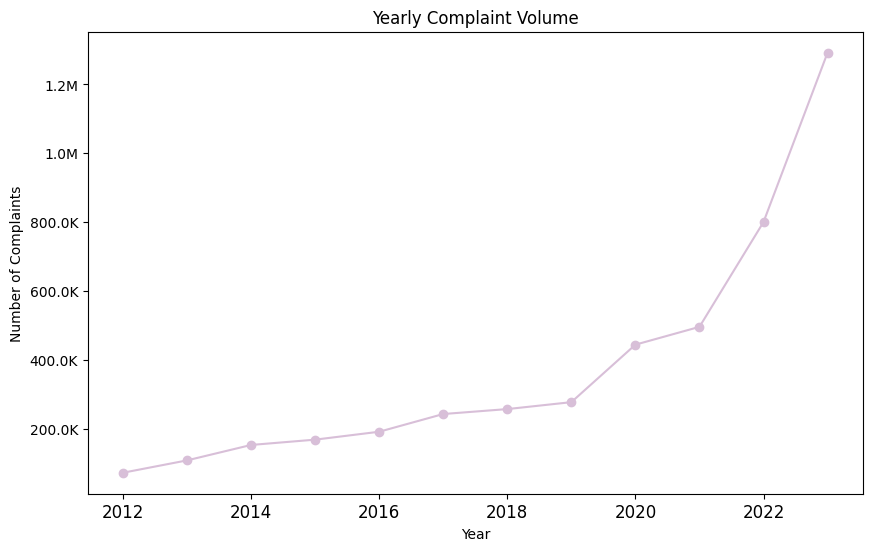

In [46]:
# Format numbers as 'X.XM' for millions and 'X.XK' for thousands
def format_yaxis(value, _):
    if value >= 1_000_000:  # For 1 million and above
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:  # For thousands
        return f"{value / 1_000:.1f}K"
    else:  # For values below 1,000
        return f"{int(value)}"

fil_df["Year"] = fil_df["Date received"].dt.year
yearly_complaints = fil_df.groupby("Year")["Complaint ID"].count()


ax = yearly_complaints.plot(kind="line", marker="o", title="Yearly Complaint Volume", color="thistle", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.xticks(fontsize=12)

#applying the formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

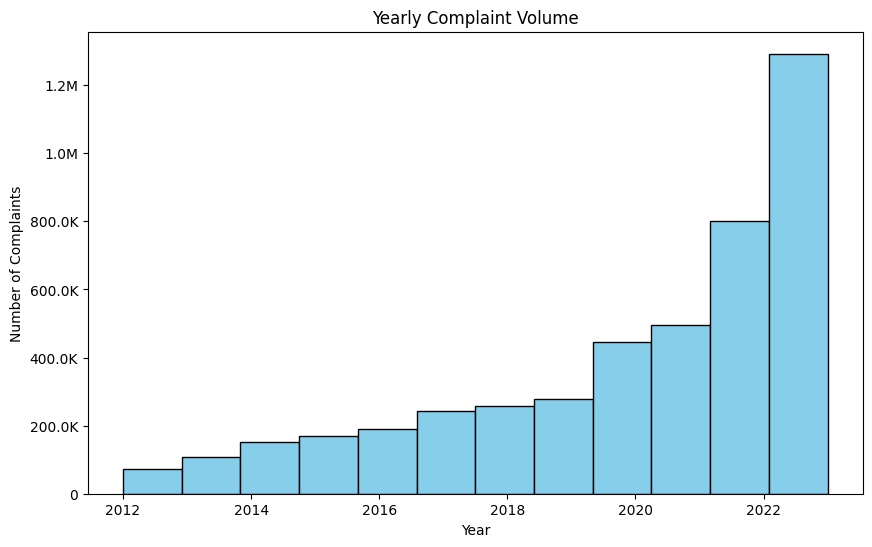

In [34]:
# Plotting as histogram, it is not the right choice to use it so it's part of the invistigation
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(yearly_complaints.index, weights=yearly_complaints.values, bins=len(yearly_complaints), color='skyblue', edgecolor='black')

plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.title("Yearly Complaint Volume")

#applying the formatter
ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

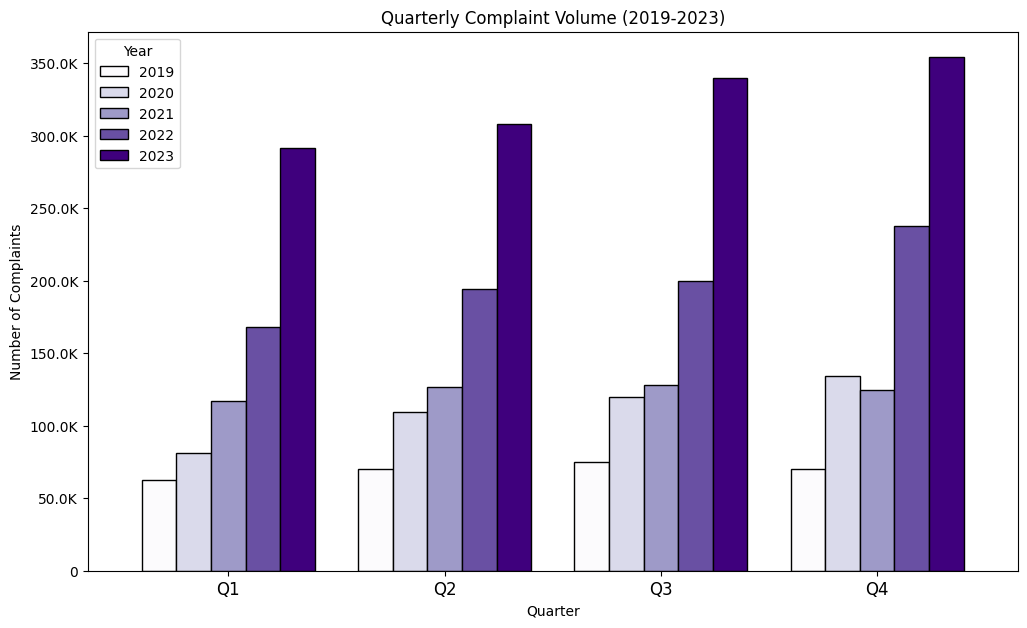

In [48]:
#since there is an increase since the year 2019, lets see the qurater volumn of complaints for the these years
#extracting year and month 
fil_df["Year"] = fil_df["Date received"].dt.year
fil_df["Month"] = fil_df["Date received"].dt.month

#filtring data for the years 2019, 2020, 2021, 2022, and 2023, and the copy for avoiding the warning previously occured 
filtered_data = fil_df[fil_df["Year"].isin([2019,2020, 2021, 2022, 2023])].copy()  

# Define a function to map months to quarters
def get_quarter(month):
    if month in [1, 2, 3]:
        return "Q1"
    elif month in [4, 5, 6]:
        return "Q2"
    elif month in [7, 8, 9]:
        return "Q3"
    elif month in [10, 11, 12]:
        return "Q4"

#applying the function to create a new column 
filtered_data.loc[:, 'Quarter'] = filtered_data['Month'].apply(get_quarter)

#grouping by and counting the number of complaints
quarterly_complaints = filtered_data.groupby(["Quarter", "Year"])["Complaint ID"].count().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(12, 7))
quarterly_complaints.plot(kind="bar", ax=ax, width=0.8, colormap="Purples", edgecolor="black")
plt.xlabel("Quarter")
plt.ylabel("Number of Complaints")
plt.title("Quarterly Complaint Volume (2019-2023)")

#applying the formatter 
ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))

plt.xticks(fontsize =12, rotation=0)  
plt.show()

##### We can notice that taking the yearly and the quartly volumes, the complaints increased the most ever since 2019, this historical change shows the increasment during the past 5 years

---

### <font color="crimson">**Yearly common submission methods usage**</font>

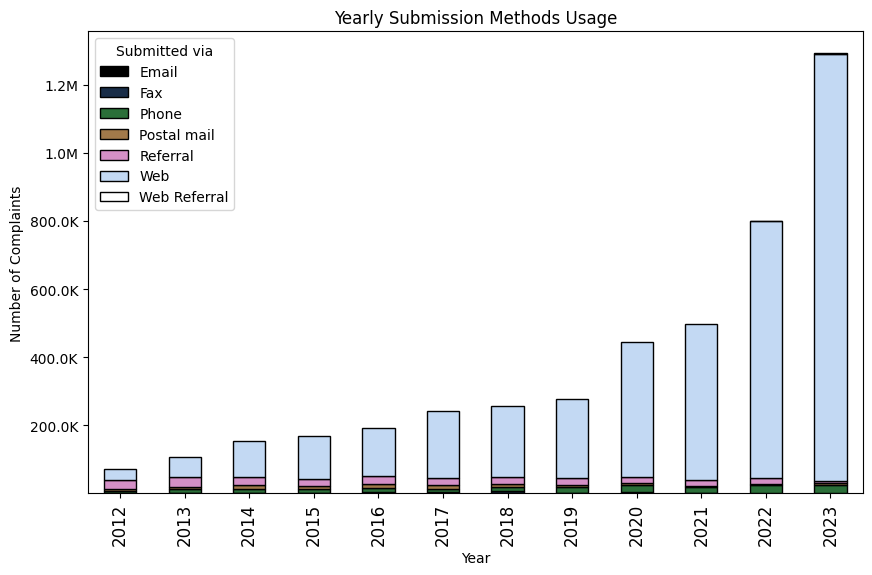

In [49]:
#group by and count the number of occurrences
submission_counts = fil_df.groupby(["Year", "Submitted via"]).size().reset_index(name="Count")

#to make submission methods as columns and counting the number of complaints per year
submission_pivot = submission_counts.pivot(index='Year', columns='Submitted via', values='Count').fillna(0)

#identifying the most used submission method each year
submission_pivot['Most Used Method'] = submission_pivot.idxmax(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
submission_pivot.drop(columns='Most Used Method').plot(kind="bar", stacked=True, ax=ax, title="Yearly Submission Methods Usage", colormap='cubehelix', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.xticks(fontsize =12)
#applying the formatter 
ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))
plt.show()

##### The web is the most used submission method, even though some still use the referral and the phone but majority goes for the web, that is because it is easier to use and the fastest way to submit a form😊

---

### <font color="crimson">**What are the common issues reported**</font>

In [37]:
fil_df["Issue"].value_counts()

Issue
Incorrect information on your report                                                1232421
Improper use of your report                                                          629976
Problem with a credit reporting company's investigation into an existing problem     589336
Attempts to collect debt not owed                                                    192756
Managing an account                                                                  120192
                                                                                     ...   
Unexpected fees                                                                           8
Problems receiving the advance                                                            8
Lender sold the property                                                                  7
Property was damaged or destroyed property                                                7
Lender damaged or destroyed property                                      

In [38]:
#counting the occurrencess of each issue
issue_counts = fil_df["Issue"].value_counts()

#converting the series to a df for better display
issue_counts_df = issue_counts.reset_index()
issue_counts_df.columns = ["Issue", "Count"]  
issue_counts_df

,Issue,Count
0,Incorrect information on your report,1232421
1,Improper use of your report,629976
2,Problem with a credit reporting company's inve...,589336
3,Attempts to collect debt not owed,192756
4,Managing an account,120192
...,...,...
172,Unexpected fees,8
173,Problems receiving the advance,8
174,Lender sold the property,7
175,Property was damaged or destroyed property,7


In [39]:
#to make the table above fancier, using CSS styles😎
fancy_table = issue_counts_df.style \
    .set_table_attributes('style="width: 100%; border-collapse: collapse;"') \
    .format({'Count': '{:,.0f}'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', 'lightblue'), ('color', 'black'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]},
    ])
fancy_table

,Issue,Count
0,Incorrect information on your report,"1,232,421"
1,Improper use of your report,"629,976"
2,Problem with a credit reporting company's investigation into an existing problem,"589,336"
3,Attempts to collect debt not owed,"192,756"
4,Managing an account,"120,192"
5,"Loan modification,collection,foreclosure","111,662"
6,Incorrect information on credit report,"102,684"
7,Problem with a company's investigation into an existing problem,"89,633"
8,Written notification about debt,"83,564"
9,Trouble during payment process,"77,161"


##### The top issues reported are all falling under the credit reporting and repair product category😦

---

### <font color="crimson">**Which company holds most of the complaints + The type of complaints for top 10 companies with most complaints**</font>

In [40]:
#viewing the count of complaints in each company
fil_df["Company"].value_counts()

Company
EQUIFAX, INC.                                                               885805
TRANSUNION INTERMEDIATE HOLDINGS, INC.                                      805062
Experian Information Solutions Inc.                                         744503
BANK OF AMERICA, NATIONAL ASSOCIATION                                       135283
WELLS FARGO & COMPANY                                                       123650
                                                                             ...  
TITLE FINANCIAL CORPORATION                                                      1
LoanMe, Inc.                                                                     1
Lakeview Mortgage Bankers Corp.                                                  1
Priority Recovery Law PLC                                                        1
Merchants & Medical Adjustment Bureau, Inc. dba Credit Bureau Associates         1
Name: count, Length: 7119, dtype: int64

In [41]:
fil_df["Company"].duplicated().sum()

4496450

In [20]:
#companies holding most complaints
top_10_companies = sorted_complaints.head(10)
top_10_companies

Company
EQUIFAX, INC.                             885805
TRANSUNION INTERMEDIATE HOLDINGS, INC.    805062
Experian Information Solutions Inc.       744503
BANK OF AMERICA, NATIONAL ASSOCIATION     135283
WELLS FARGO & COMPANY                     123650
JPMORGAN CHASE & CO.                      113019
CAPITAL ONE FINANCIAL CORPORATION          92467
CITIBANK, N.A.                             90132
SYNCHRONY FINANCIAL                        48093
Navient Solutions, LLC.                    39043
Name: Complaint ID, dtype: int64

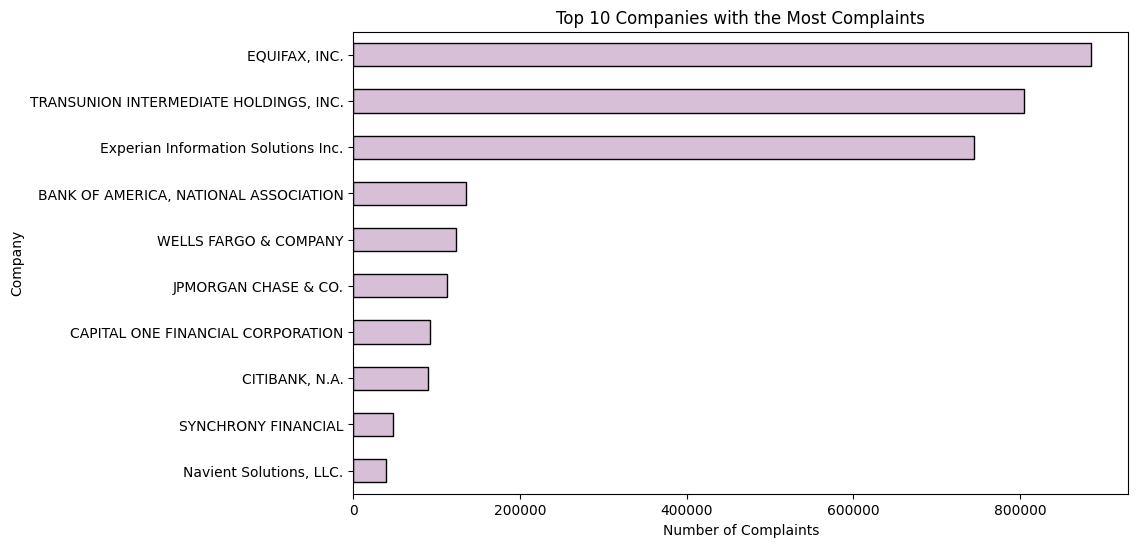

In [39]:
#grouping by and the number of complaints
company_complaints = fil_df.groupby("Company")["Complaint ID"].count()
sorted_complaints = company_complaints.sort_values(ascending=False)
most_complaints_company = sorted_complaints.idxmax()
most_complaints_count = sorted_complaints.max()

top_10_companies = sorted_complaints.head(10).sort_values(ascending=True)

top_10_companies.plot(kind="barh", color="thistle", edgecolor="black", figsize=(10, 6))
plt.title("Top 10 Companies with the Most Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Company")
plt.show()

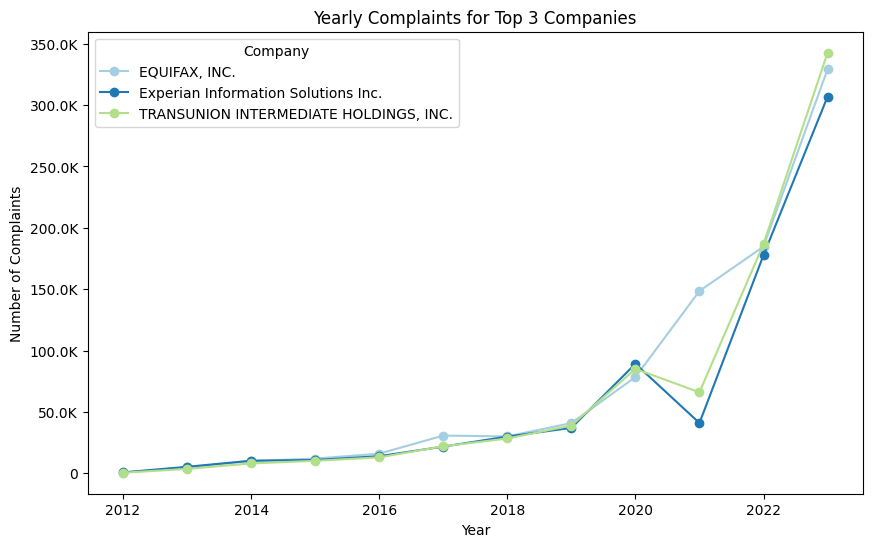

In [45]:
#calculating the yearly complaints for each company and getting the top 3 companies only
fil_df["Year"] = fil_df["Date received"].dt.year
yearly_company = fil_df.groupby(["Company", "Year"])["Complaint ID"].count().reset_index()
top_3_companies = yearly_company.groupby("Company")["Complaint ID"].sum().nlargest(3).index
company_data = yearly_company[yearly_company["Company"].isin(top_3_companies)]

ax = company_data.pivot(index="Year", columns="Company", values="Complaint ID").plot(kind="line", marker="o", color = sns.color_palette("Paired"),figsize=(10, 6))
plt.title("Yearly Complaints for Top 3 Companies")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.legend(title="Company", loc="upper left")

ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))

plt.show()

##### Historical records show that 2021 had the most issues resolved, followed by a rise in complaints. Some sources such that the Fedral Trade Commission mentioned that during these years because the number of consumer complaining of the no responses during the pandamic, these companies tried to resolve so issues, and we can see the decrease in the colume, however after that the complaonts started to increase back again. Those companies are resolving complaints by pressure from goverments and other entities🫤😐


In [45]:
#The type of complaints for top 10 companies with most complaints
#making a list for the top 10 companies
top_10_companies_list = sorted_complaints.head(10).index
top_companies_products = fil_df[fil_df["Company"].isin(top_10_companies_list)]

#group by and count complaints
company_product_counts_df = (top_companies_products.groupby(["Company", "Product_Category"])["Complaint ID"].count().reset_index(name="Count"))

#then making a pivot table to view the categories with the companies
table_co = pd.pivot_table(company_product_counts_df, values="Count", index="Company", columns="Product_Category", fill_value=0)
company_total_counts = company_product_counts_df.groupby('Company')['Count'].sum().sort_values(ascending=False).index
table_co = table_co.reindex(company_total_counts)
table_co

Product_Category,Banking Services,Credit Reporting and Repair,Credit and Prepaid Cards,Debt Services,Loans,Money Transfers and Virtual Currency,Other Financial Services
Company,,,,,,,
"EQUIFAX, INC.",62.0,871951.0,3631.0,9523.0,601.0,34.0,3.0
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",67.0,790824.0,3920.0,9622.0,588.0,40.0,1.0
Experian Information Solutions Inc.,98.0,730451.0,3613.0,9624.0,651.0,59.0,7.0
"BANK OF AMERICA, NATIONAL ASSOCIATION",41858.0,8845.0,27161.0,4584.0,48527.0,4235.0,73.0
WELLS FARGO & COMPANY,39674.0,8780.0,11611.0,4506.0,54878.0,4144.0,57.0
JPMORGAN CHASE & CO.,34954.0,10397.0,30530.0,4459.0,27771.0,4848.0,60.0
CAPITAL ONE FINANCIAL CORPORATION,10075.0,25237.0,41608.0,9807.0,4980.0,742.0,18.0
"CITIBANK, N.A.",15821.0,10019.0,43635.0,7368.0,12045.0,1210.0,34.0
SYNCHRONY FINANCIAL,1565.0,10232.0,26357.0,7691.0,1710.0,534.0,4.0


##### The top 3 companies are all assosiated with credit reporting services, which makes sense why they all take first place. Following, since our agency aim is not to ruin other companies reputation but adress them, most of the credit reporting companiess mentioned hold various issues and scandels regrading unethical credit reporting investigations😨, causing the consumers with no choice but reporting them to our agency(CFPB)🔍

---

### <font color="crimson">**Which state holds most of the complaints + which company**</font>

In [46]:
#grouping and reset index to get the total complaints per state
state_complaint = fil_df.groupby('State')['Complaint ID'].count().reset_index()
state_complaint.columns = ['State', 'Complaints']
state_complaint = state_complaint.sort_values(by='Complaints', ascending=False)
state_complaint

,State,Complaints
13,FL,530482
8,CA,522571
53,TX,468126
15,GA,303214
42,NY,289112
...,...,...
0,AA,59
32,MP,54
6,AS,46
28,MH,33


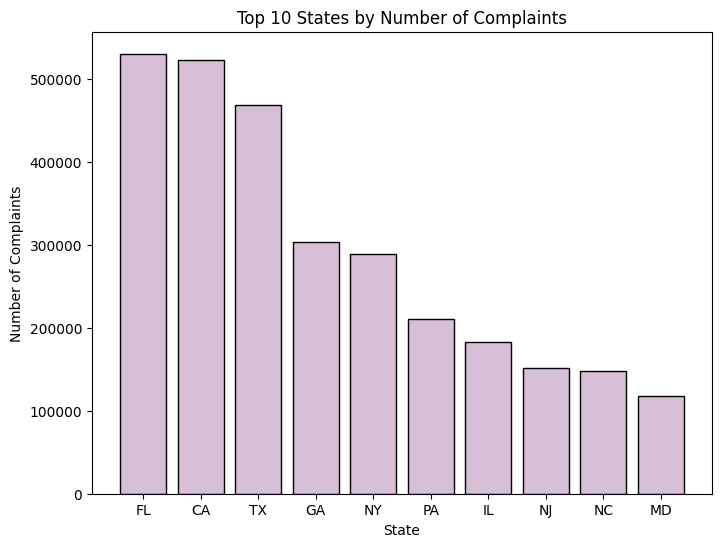

In [47]:
#taking first states with the highest number of complaints
top_10_states = state_complaint.head(10)
plt.figure(figsize=(8, 6))
plt.bar(top_10_states['State'], top_10_states['Complaints'], color="thistle", edgecolor="black")
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.title('Top 10 States by Number of Complaints')
plt.show()

In [49]:
#grouping to get the count of complaints for each company in each state
company_state= fil_df.groupby(["State", "Company"]).size().reset_index(name="Count")

#top 10 complained companies and states
top_10_companies = company_state.groupby("Company")["Count"].sum().nlargest(10).index
top_10_states = company_state.groupby("State")["Count"].sum().nlargest(10).index

#filtering top 10 companies andstates
company_state = company_state[company_state["Company"].isin(top_10_companies) & company_state["State"].isin(top_10_states)]

#this is sorted based on the total count of complaints for each company
company_state = company_state.sort_values(by=["Count"], ascending=False)
company_state

,State,Company,Count
13364,FL,"EQUIFAX, INC.",118630
15068,FL,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",108618
57779,TX,"EQUIFAX, INC.",106378
13432,FL,Experian Information Solutions Inc.,99192
59475,TX,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",96497
...,...,...,...
21393,IL,"Navient Solutions, LLC.",1533
41068,NJ,"Navient Solutions, LLC.",1357
29555,MD,SYNCHRONY FINANCIAL,1256
29251,MD,"Navient Solutions, LLC.",1137


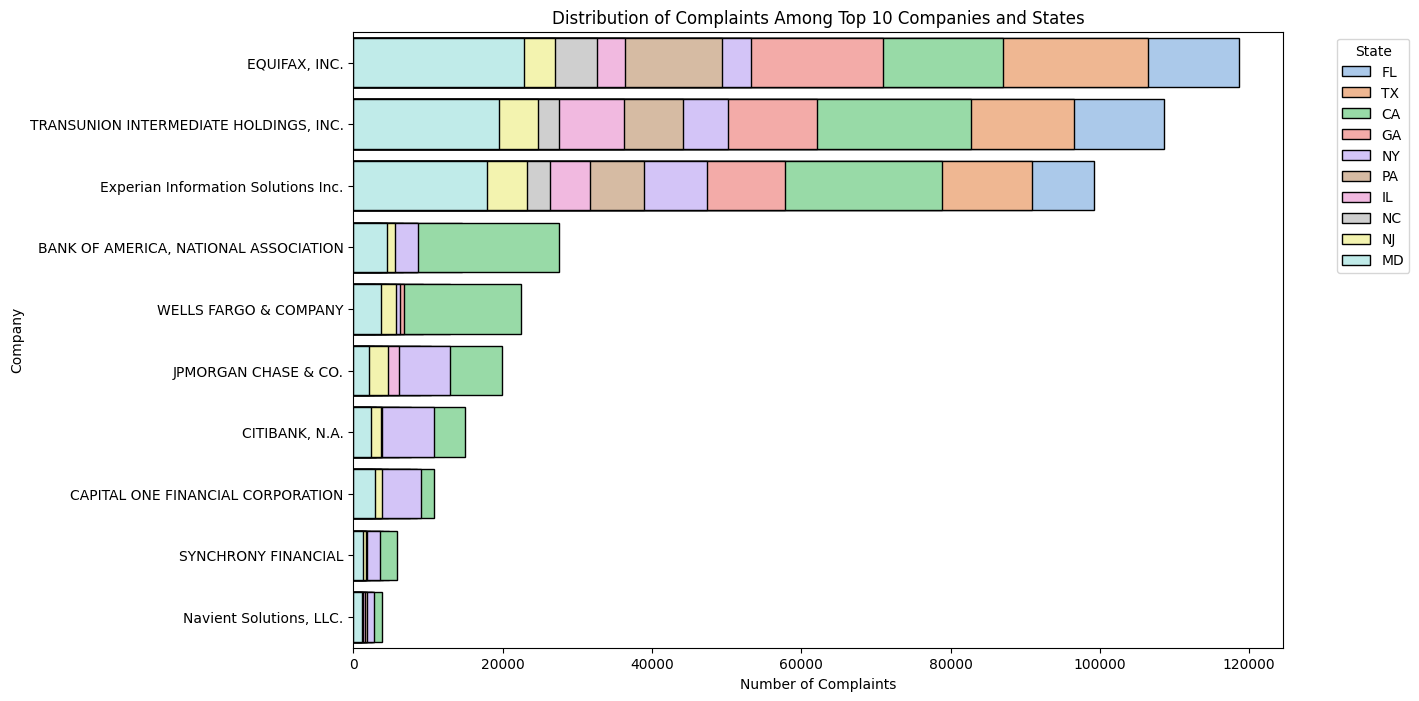

In [56]:
#now plotting the findings above
plt.figure(figsize=(12, 8))
sns.barplot(x="Count", y="Company", data=company_state, hue="State", dodge=False, palette="pastel", edgecolor="black")
plt.xlabel("Number of Complaints")
plt.ylabel("Company")
plt.title("Distribution of Complaints Among Top 10 Companies and States")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

##### Florida, California, and Texas having most of the complaints can go for the reason these states populations are greater than other, and the type of living there force people to be assosiatd with the avilable companies who hold some issues in dealing with consumers reportings🫤

---

### <font color="crimson">**Company side information**</font>

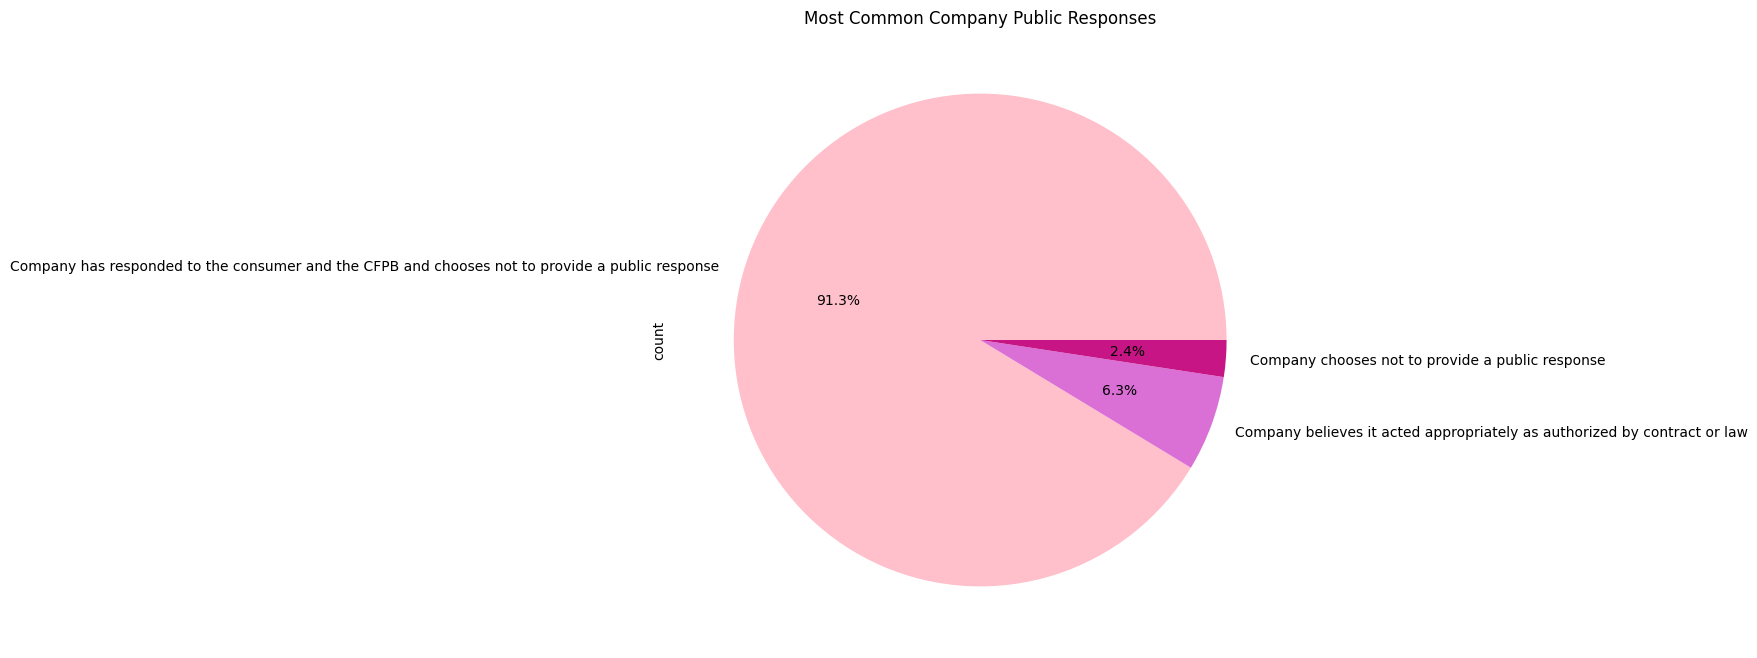

In [82]:
fil_df["Company public response"].value_counts().nlargest(3).plot(kind="pie", colors=["pink", "orchid", "mediumvioletred"],autopct="%1.1f%%", figsize=(8, 8))
plt.title("Most Common Company Public Responses")
plt.show()

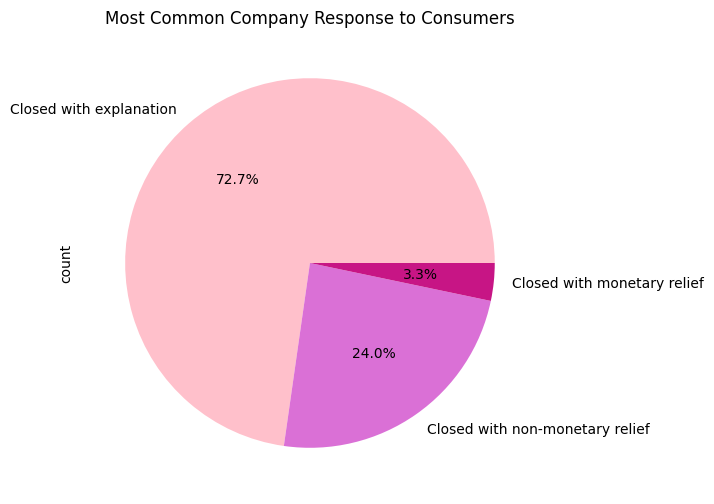

In [88]:
fil_df["Company response to consumer"].value_counts().nlargest(3).plot(kind="pie", colors=["pink", "orchid", "mediumvioletred"],autopct="%1.1f%%", figsize=(6, 6))
plt.title("Most Common Company Response to Consumers")
plt.show()

##### Usually, most companies close their cases with an explanation as around 73% of complaints marked that ratio, following closed with a non monetary relief, and monetary relief. While their public response is mostly replying to consumers without providing a public response, or they beleive they acted in a proper way by law, while the others did not bother to provide a publuc response😠

---

### <font color="red">**OVERALL🥳**</font>
##### 1. The CFPC is sending majority of complaints to companies within timeline of 5 days.
##### 2. Complaints in the financial sector will keep increasing by the years.
##### 3. Bigger states cover most of the complaints.
##### 4. Most companies tend to provide an explanation to the consumer that meet their desired resolution or explains why no further action will be taken.
##### 5. Companies providing credit reporting services are advised to keep a regular check up on their customer's feedback.
##### 6. Scandals and company reputation affect the volume of complaints, once a company faces a scandal it is hard to go back.
##### 7. Most companies that are providing credit reporting services are having scandals, and one of the reasons why the volume of complaints increased after 2019 is due to some of those companies failing to respond to consumer complaints during the pandemic.


---

#### <font color="brown">**Possible Limitations:**</font>
##### - The dataset available contains rich information, but more details need to be clarified.
##### - The column Timely Response? should include more discreptions in order to make better judgment on it.
##### - Missing values that are not provided based on the privacy and disputation of consumers.

---

##### This website talked about the credit reporting rules: https://www.cnbc.com/2022/10/17/transunion-equifax-experian-may-have-violated-credit-reporting-rules-rep-jim-clyburn-says.html
##### Reading source used 1: https://www.ftc.gov/news-events/news/press-releases/2023/10/ftc-cfpb-settlement-require-trans-union-pay-15-million-over-charges-it-failed-ensure-accuracy-tenant
##### Reading source used 2: https://www.csoonline.com/article/567833/equifax-data-breach-faq-what-happened-who-was-affected-what-was-the-impact.html
##### Reading source used 3: https://www.bbc.com/news/technology-54706066
##### Shoutout to this amazing website for providing colours inspo: https://matplotlib.org/stable/gallery/color/named_colors.html

---

###### ✨This is the end of the notebook, hope it was informative and engageable for further invistigation and improvment✨